<a href="https://colab.research.google.com/github/Sreekodavanti/Data-Analytics/blob/main/Data_Analysis_on_Netflix_shows_and_Choosing_the_best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("/content/netflix_titles_nov_2019.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [ ]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [ ]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [ ]:
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
df['country'] = df['country'].fillna('unknown')

In [ ]:
df.isnull().sum()

show_id           0
title             0
director          0
cast              0
country           0
date_added      642
release_year      0
rating           10
duration          0
listed_in         0
description       0
type              0
dtype: int64

In [ ]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

In [ ]:
print(df['country'])

0                    South Korea
1                        unknown
2                          India
3       France, Senegal, Belgium
5                        Nigeria
                  ...           
5832               United States
5833               United States
5834                     Denmark
5835               United States
5836               United States
Name: country, Length: 5186, dtype: object


In [ ]:
df['country'] = df['country'].apply(lambda x:x.capitalize())
df['country'].head()

0                 South korea
1                     Unknown
2                       India
3    France, senegal, belgium
5                     Nigeria
Name: country, dtype: object

In [ ]:
df[['date_added','release_year']]


,date_added,release_year
0,"November 30, 2019",2019
1,"November 30, 2019",2019
2,"November 30, 2019",2019
3,"November 29, 2019",2019
5,"November 29, 2019",2018
...,...,...
5832,"November 1, 2010",1987
5833,"November 18, 2009",2009
5834,"May 5, 2009",2007
5835,"February 4, 2008",2007


In [ ]:
df['added_month'] = df['date_added'].apply(lambda x:x.split(',')[0].split()[0])
df['added_year'] = df['date_added'].apply(lambda x:x.split(',')[1])
df[['added_month','added_year']]

,added_month,added_year
0,November,2019
1,November,2019
2,November,2019
3,November,2019
5,November,2019
...,...,...
5832,November,2010
5833,November,2009
5834,May,2009
5835,February,2008


In [ ]:
df.drop('date_added', axis=1, inplace = True)

In [ ]:
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
added_month     object
added_year      object
dtype: object

In [ ]:
df['added_year'] = df['added_year'].astype(int)

In [ ]:
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
added_month     object
added_year       int64
dtype: object

#### Droping rows in which added_year is less than release_year


In [ ]:
df.drop(df[df['added_year']<df['release_year']].index, inplace=True)

In [ ]:
df.tail(3)

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,type,added_month,added_year
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,May,2009
5835,70157452,Dinner for Five,unknown,unknown,United states,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,February,2008
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United states,2006,NR,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",Movie,January,2008


### Univariate Analysis

#### Analyse the type feature


In [ ]:
df['type'].nunique()

2

In [ ]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      3929
TV Show    1251
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

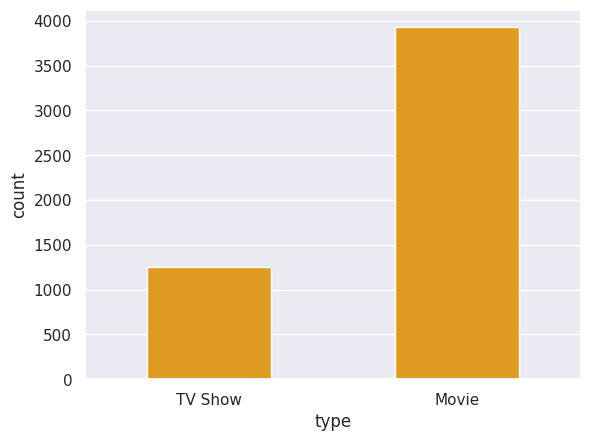

In [ ]:
sns.countplot(x = df['type'],width=0.5, color = '#ffa600')


#### The number of movies and TV shows in netflix

In [ ]:
print(f'On Netflix,{round((type_counts[0]/type_counts.sum())*100,2)}% are Movie and {round((type_counts[1]/type_counts.sum())*100,2)}% are TV show')

On Netflix,75.85% are Movie and 24.15% are TV show


### Analysing Director feature

In [ ]:
df['director'].nunique()


3075

In [ ]:
director_counts = df['director'].value_counts()
director_counts

director
unknown                   1288
Raúl Campos, Jan Suter      18
Marcus Raboy                14
Jay Karas                   13
Jay Chapman                 12
                          ... 
Lenin Bharathi               1
James Foley                  1
Kunihiko Yuyama              1
Ranjit Jeyakodi              1
Sorin Dan Mihalcescu         1
Name: count, Length: 3075, dtype: int64

In [ ]:
df['country'].nunique()

494

In [ ]:
country_counts = df['country'].value_counts()
country_counts

country
United states                                            1641
India                                                     693
Unknown                                                   392
United kingdom                                            270
Japan                                                     122
                                                         ... 
Indonesia, united states                                    1
United states, united kingdom, morocco                      1
United kingdom, canada, united states, cayman islands       1
Mexico, argentina                                           1
Spain, mexico, france                                       1
Name: count, Length: 494, dtype: int64

<ipython-input-30-8887624605a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x  = df['country'], order = top_countries.index, palette = 'cool')


<Axes: xlabel='country', ylabel='count'>

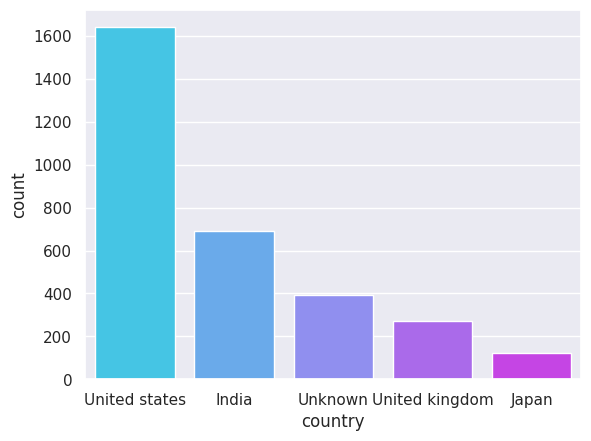

In [ ]:
top_countries = country_counts.nlargest(5)
top_countries
sns.countplot(x  = df['country'], order = top_countries.index, palette = 'cool')

#### Analyzing 'added_year' & 'added_month' Feature

In [ ]:
df['added_year'].nunique()

12

In [ ]:
df['added_year'].value_counts()

added_year
2019    1842
2018    1626
2017    1180
2016     408
2015      72
2014      19
2011      13
2013       8
2012       7
2009       2
2008       2
2010       1
Name: count, dtype: int64

<Axes: xlabel='added_year', ylabel='count'>

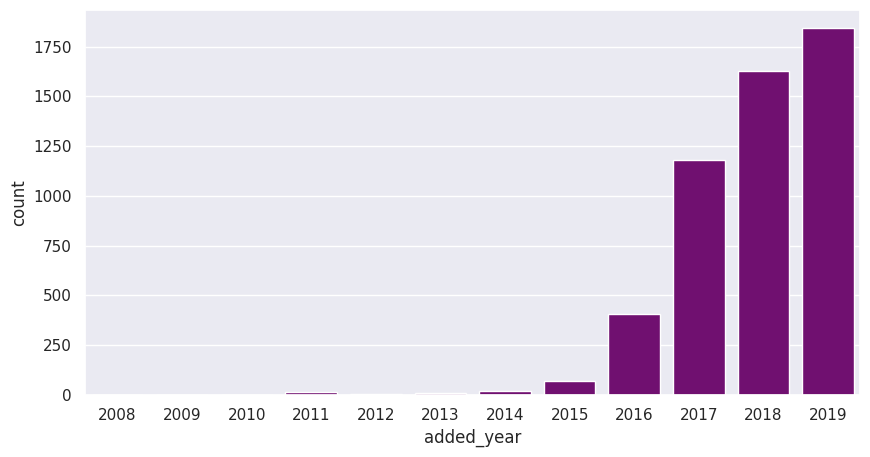

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x = df['added_year'], color = 'purple')

In [ ]:
df['added_month'].nunique()


12

In [ ]:
df['added_month'].value_counts()

added_month
October      579
November     543
March        502
August       453
September    419
December     419
July         412
April        405
January      388
May          380
February     341
June         339
Name: count, dtype: int64

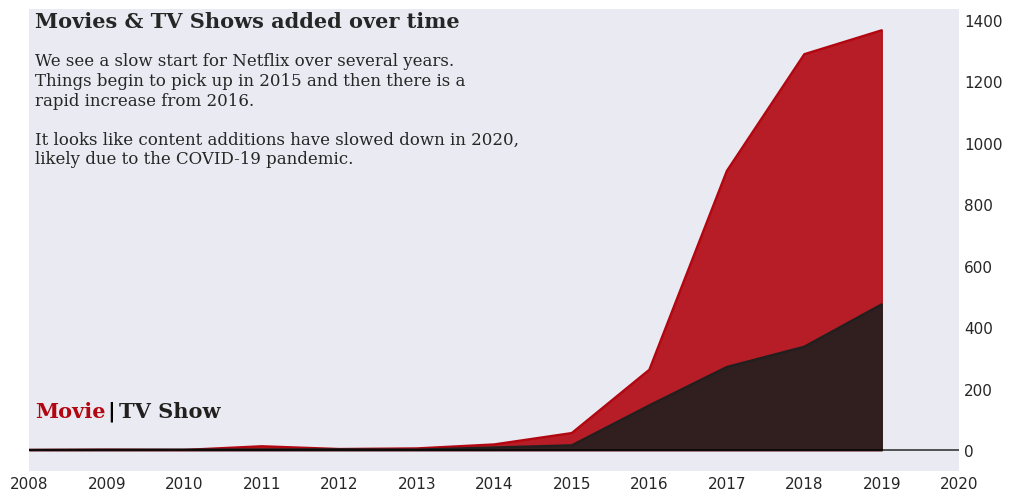

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['added_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59,
'''We see a slow start for Netflix over several years.
Things begin to pick up in 2015 and then there is a
rapid increase from 2016.

It looks like content additions have slowed down in 2020,
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
pip install plotly

<Axes: xlabel='added_month', ylabel='count'>

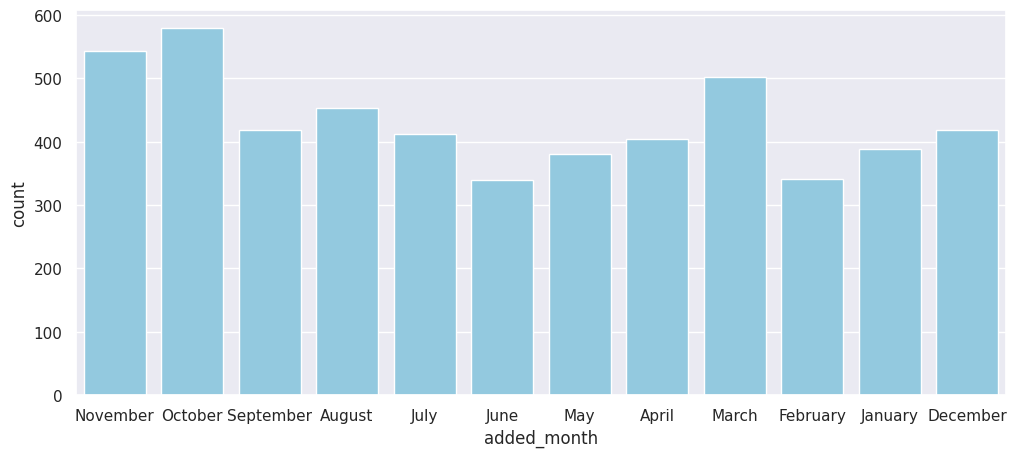

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['added_month'], color = 'skyblue')

#### Analyzing 'rating' feature

In [ ]:
df['rating'].nunique()

14

In [ ]:
df['rating'].value_counts(normalize=True)

rating
TV-MA       0.331660
TV-14       0.271236
TV-PG       0.116216
R           0.084749
PG-13       0.043822
NR          0.040734
PG          0.030888
TV-G        0.022201
TV-Y7       0.021622
TV-Y        0.016988
TV-Y7-FV    0.011969
G           0.006178
UR          0.001351
NC-17       0.000386
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='rating'>

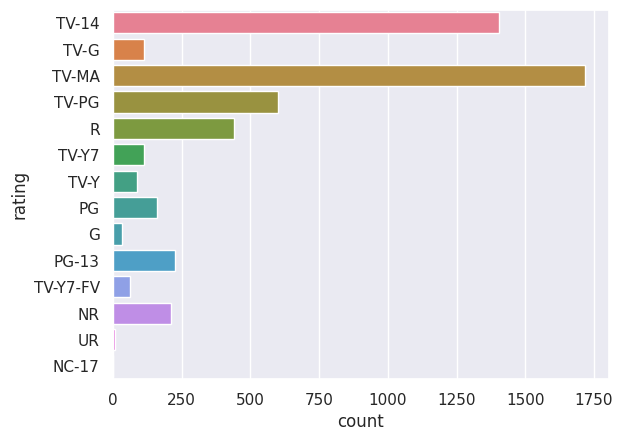

In [ ]:
sns.countplot(y = df['rating'], hue =df['rating'])

### Bivariate Analysis

<Axes: xlabel='country', ylabel='count'>

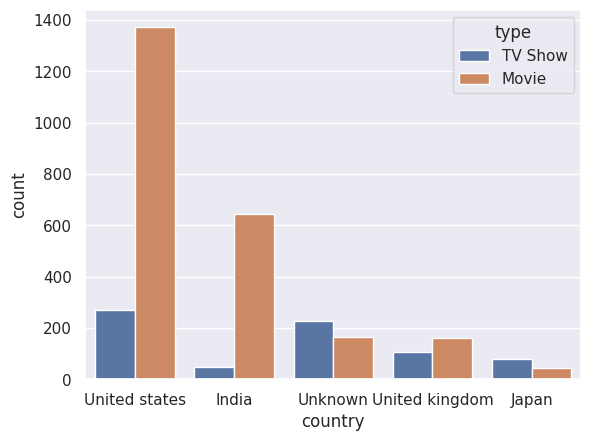

In [ ]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['type'])


* In United states, Movies are more popular than TV shows
* In India, Movies are more popular than TV shows.
* In United Kingdom, Movies and TV Show are equally popular.
* In Japan, TV Shows are more popular than Movie.






#### most popular 'rating' in the top countries



<Axes: xlabel='country', ylabel='count'>

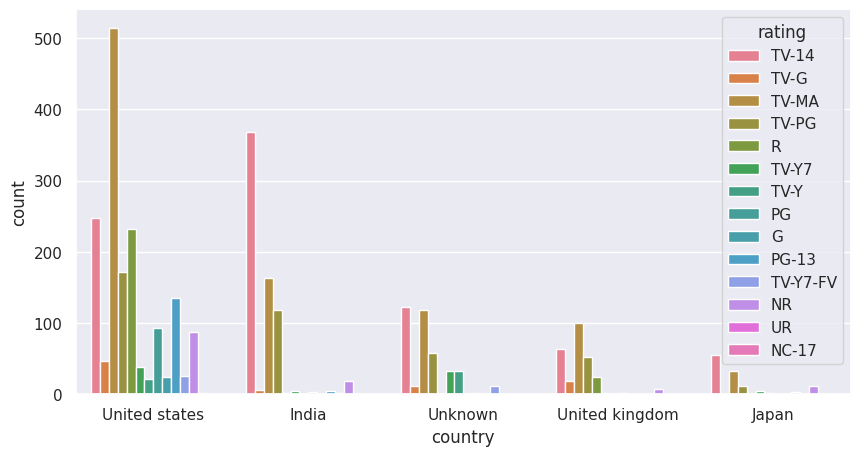

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['country'], order = top_countries.index, hue =df['rating'])

In the United States, most shows are rated 'TV-MA.' Moving over to India, the majority of shows have a 'TV-14' rating. Now, let's hop to the United Kingdom, where you'll find that most shows are rated 'TV-MA' as well. Finally, in Japan, the common rating for most shows is 'TV-14.

### Summary

*   69.78% of content on Netflix consists of movies, while 30.22% are TV shows.
*   A significant portion of Netflix shows originates from the USA and India.

* The most common ratings for shows on Netflix are 'TV-MA' and 'TV-14.'
* In the United States and India, movies are more popular than TV shows.

* Conversely, in Japan, TV shows are more favored than movies.




### Model Training

#### performing some feature engineering by label encoding.

In [ ]:
str_col = df.select_dtypes(include=('object')).columns
flt_col = df.select_dtypes(include=('float')).columns

Label Encoding Categorical Columns in Netflix Dataset

Label encoding is a common technique used to convert categorical data into a format suitable for machine learning algorithms. It assigns a unique integer label to each unique category within a column. This encoding simplifies the representation of categorical data and allows it to be used in machine learning models that require numerical input.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for col in str_col:
    df[col] = le.fit_transform(df[col].astype('str'))

In [ ]:
df.head()

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,type,added_month,added_year
0,81193313,902,3065,1501,293,2019,6,0,303,1653,1,9,2019
1,81197050,1657,1709,831,486,2019,7,146,220,2277,0,9,2019
2,81213894,4635,24,3921,173,2019,6,39,156,301,0,9,2019
3,81082007,391,1855,2678,136,2019,6,8,247,1426,0,9,2019
5,81172754,1017,2000,3408,248,2018,6,9,178,3182,0,9,2019


#### Training and Testing


Data Preparation for Netflix Content Classification


The separation of feature data (X) from the target variable (Y) is a fundamental step in machine learning and classification tasks. It allows for the training of classification models that predict the content type of Netflix entries based on the available features and attributes.

In [ ]:
x = df.drop(['type'], axis='columns')
y = df[['type']]

In [ ]:
x.shape

(5180, 12)

In [ ]:
y.shape

(5180, 1)

Data Splitting into Training and Testing Sets

Splitting the dataset into training and testing sets is a fundamental step in machine learning, allowing for the development and evaluation of predictive models.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Random Forest Classifier for Predictive Modeling



In [ ]:
y.head()

,type
0,1
1,0
2,0
3,0
5,0


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

<ipython-input-52-0775487ce475>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy of the RandomForestClassifier on the test set: 1.0


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1158
           1       1.00      1.00      1.00       396

    accuracy                           1.00      1554
   macro avg       1.00      1.00      1.00      1554
weighted avg       1.00      1.00      1.00      1554



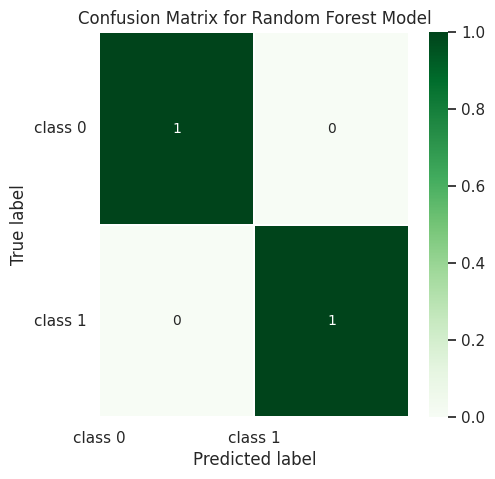

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(5,5))
sns.set(font_scale = 1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['class 0', 'class 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

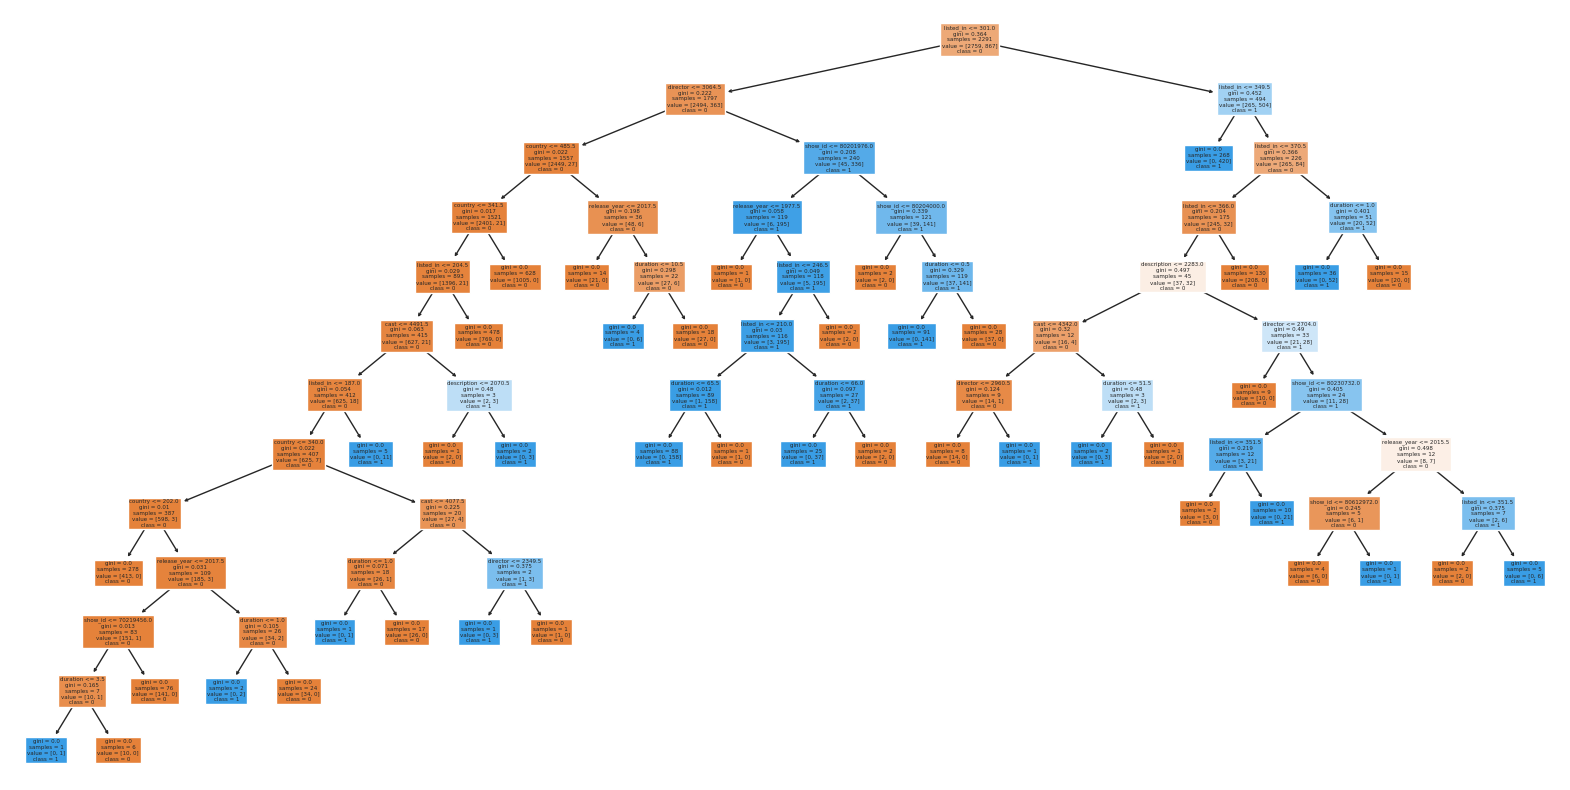

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Accessing individual trees within the random forest
estimator = rf.estimators_[0]  # Selecting the first tree, you can choose any other index as well

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=x.columns, class_names=['0', '1'], filled=True)
plt.show()
